In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from waveletFunctions import wavelet, wave_signif
import matplotlib.patheffects as PathEffects
plt.style.use('default')

In [16]:
dftk = pd.read_csv('./residual_tide_japan.csv',index_col=0)
dftk = dftk[100:-100]
print(f'Shape:{dftk.shape}')
dftk.head()

Shape:(376, 15)


,Kushiro_Residual,Miyako_Residual,Ofunato_Residual,Ayukawa_Residual,Onahama_Residual,Chichijima_Residual,Hachijojima_Residual,Irozaki_Residual,Omaezaki_Residual,Kushimoto_Residual,Muroto_Residual,Tosashimizu_Residual,Aburatsu_Residual,Makurazaki_Residual,Amami_Residual
Time_min_Tide,,,,,,,,,,,,,,,
500,-1.666851,-3.512876,1.077767,-3.493265,1.713165,3.115827,-1.687996,-4.491977,-4.246978,-2.306686,-0.998228,-2.524061,8.510877,3.205834,1.042752
505,-0.945957,-1.787572,-3.225262,-3.715644,0.596594,0.620414,-1.210113,-2.787531,-3.473784,-2.358939,0.129486,0.626004,-0.326475,-2.326591,-4.688397
510,0.755942,-2.089555,-4.564355,3.031056,-1.548237,-3.889972,0.242453,-0.116056,0.274480,0.571233,2.238637,-0.245228,-5.171272,4.180801,5.586439
515,0.439092,-3.417979,1.063978,-1.252415,0.280427,-0.415921,-3.331615,-0.479292,-2.004475,-0.518342,-0.674473,-3.140919,-4.026194,3.727370,-4.135745
520,-2.896152,0.228228,-0.336262,-0.565125,3.084201,2.042161,1.066603,-2.878704,1.687166,-0.629731,-0.613611,-2.064062,0.106160,-4.687993,2.142036


In [44]:
dftt = pd.read_csv('./tide_japan.csv',index_col=0)
dftt = dftt[100:-100]
print(f'Shape:{dftt.shape}')
dftt.head()

Shape:(376, 15)


,Kushiro_Tide,Miyako_Tide,Ofunato_Tide,Ayukawa_Tide,Onahama_Tide,Chichijima_Tide,Hachijojima_Tide,Irozaki_Tide,Omaezaki_Tide,Kushimoto_Tide,Muroto_Tide,Tosashimizu_Tide,Aburatsu_Tide,Makurazaki_Tide,Amami_Tide
Time_min_Tide,,,,,,,,,,,,,,,
500,115,82,92,82,82,85,136,107,98,120,141,127,133,178,141
505,116,84,88,82,81,82,136,108,98,119,141,129,123,171,134
510,118,84,87,89,79,77,137,110,101,121,142,127,117,176,143
515,118,83,93,85,81,80,133,109,98,119,138,123,117,174,132
520,115,87,92,86,84,82,137,106,101,118,137,123,120,164,137


In [4]:
ttt = pd.read_csv('../data/Station_withTTT.csv',usecols=[0,1,2,3])

In [14]:
for i,st in ttt.iterrows():
    print(st.Station, st.minutes)

Kushiro 648.1
Miyako 640.2
Ofunato 640.9
Ayukawa 650.4
Onahama 639.5
Chichijima 577.5
Hachijojima 617.7
Irozaki 636.0
Omaezaki 652.3
Kushimoto 657.8
Muroto 664.6
Tosashimizu 679.6
Aburatsu 674.0
Makurazaki 707.6
Amami 670.2


In [40]:
# colores = ['#e6194B','#f58231','#ffe119','#bfef45','#3cb44b','#42d4f4','#4363d8','#911eb4','#f032e6']
def plot_stations(data,stations,min):
    t_total = data.shape[0]*5/60. #horas
    alto  = 4
    ancho = 10
    dt = 5*60  # time step (sec)
    fig1=plt.figure(1,figsize=(ancho, alto))
    fig1.subplots_adjust(hspace=0.025, wspace=0.025)
    for i in range(len(stations)):
        eta  = data #data[:,0] # free surface in (cm)
        dt = 5*60  # time step (sec)
        time = np.arange(0,(dt*len(eta)),dt) #time in seconds
        time = (time/(60*60)) - 15/60 #time in hours
        eta = eta[::4]
        time = time[::4]
        eta = eta[:-1]
        time = time[:-1]

        # WAVELET PARAMETERS
        n    = len(eta)
        dt   = dt/60.0 # en minutos
        pad  = 0  # pad the time series with zeroes (recommended)
        dj   = 0.125  # this will do 8 sub-octaves per octave
        s0   = 2 * dt  # this says start at a scale of 2 sec (?)
        j1   = 7 / dj  # this says do 7 powers-of-two with dj sub-octaves each
        lag1 = 0.72  # lag-1 autocorrelation for red noise background
        mother = 'MORLET'

        # Wavelet transform:
        wave, period, scale, coi = wavelet(eta/100.0, dt, pad, dj, s0, j1, mother)
        power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
        Frec = 1.0/period
        global_ws = (np.sum(power, axis=1) / n )  # time-average over all times
        average_time = (np.sum(power, axis=0)) #/ n
        integrate_time = np.trapz(power,x=period,axis=0)


        # Wavelet distribution time-Frequency
        plt.figure(1) # set current figure to fig1
        ax = plt.subplot2grid((len(stations), 6), (i, 0), colspan=5)
        levels = [2.**x for x in np.arange(-14,0,0.5)]
        # levels = [0.0019/2048, 0.0019/1024, 0.0019/512, 0.0019/256, 0.0019/128, 0.0019/64, 0.0019/32, 0.0019/16,  0.0019/8, 0.0019/4, 0.0019/2, 0.0019, 0.0039, 0.0078, 0.0157, 0.0313, 0.0625,0.125,0.25,0.5,1,2,4,8,16,32]#,64,128]
        cs = ax.contourf(time,np.log2(period),np.log2(power),np.log2(levels),cmap=plt.cm.jet,extend='both')
        txtl = ax.text(t_total-1,np.log2(500),stations[i],fontsize=16, fontweight='bold',horizontalalignment='right',verticalalignment='top')
        txtl.set_path_effects([PathEffects.withStroke(linewidth=2.5, foreground='w')])
        if min != 0:
            ax.axvline(min,ls='--',color='r')
        Yticks = 2**np.log2([8, 16, 32, 64, 128, 256, 512, 720, 1440 ])
        ax.set_yticks(np.log2(Yticks))
        ax.set_yticklabels([8, 16, 32, 64, 128, 256, 512, 720, 1440])
        ax.set_ylim(np.log2(period.min()),np.log2(1440))
        ax.set_xlim(0,time.max())

        # Wavelet Spectrum Plot
        ax2 = plt.subplot2grid((len(stations), 6), (i, 5))
        ax2.semilogx(global_ws,np.log2(period))
        ax2.yaxis.tick_right()
        ax2.yaxis.set_label_position("right")
        ax2.set_yticks(np.log2(Yticks))
        ax2.set_yticklabels([8, 16, 32, 64, 128, 256, 512, 720, 1440])
        ax2.set_xticks([10**-4,10**-3,10**-2,10**-1,10**0,10**1])
        ax2.set_ylim(np.log2(period.min()),np.log2(1440))
        ax2.set_xlim(10**-5,10**2)
        ax2.grid(color='lightgray', linestyle='--', linewidth=0.5)
        for tick in ax2.get_xticklabels():
                tick.set_rotation(55)

        if i == len(stations)-1:
            ax.set_xlabel('Relative time (hours)')
            ax.set_ylabel('Period (min)')
        
        cbar = fig1.colorbar(cs,ax=ax,location='left')
        cbar.ax.set_ylabel('dB')
        fig1.tight_layout()
        plt.savefig(f'./figs/{stations[0]}.png',dpi=600)
        plt.show()

In [45]:
stations = dftt.columns.to_list()

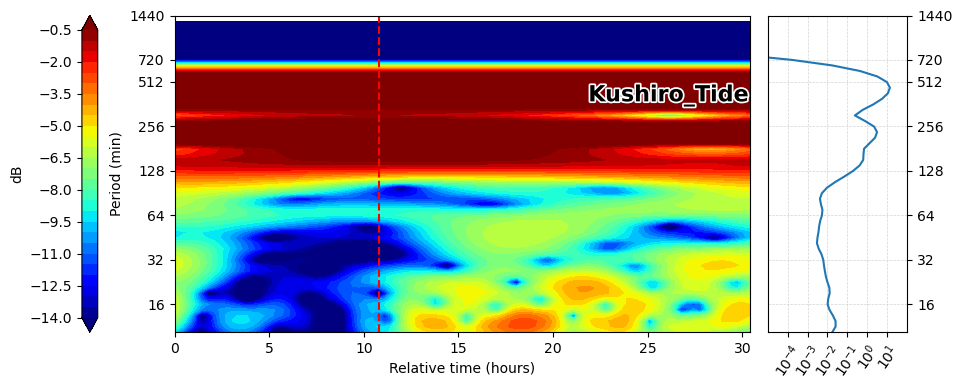

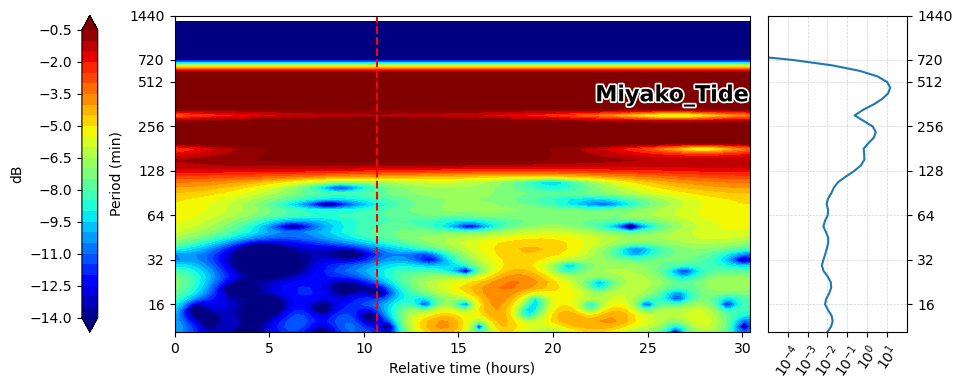

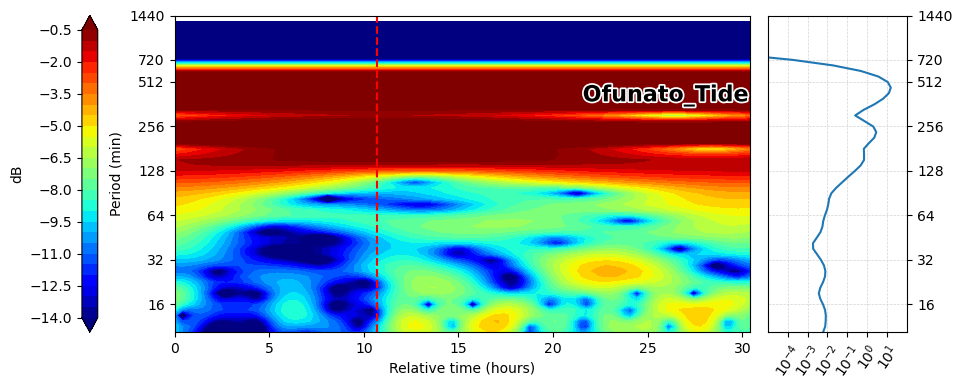

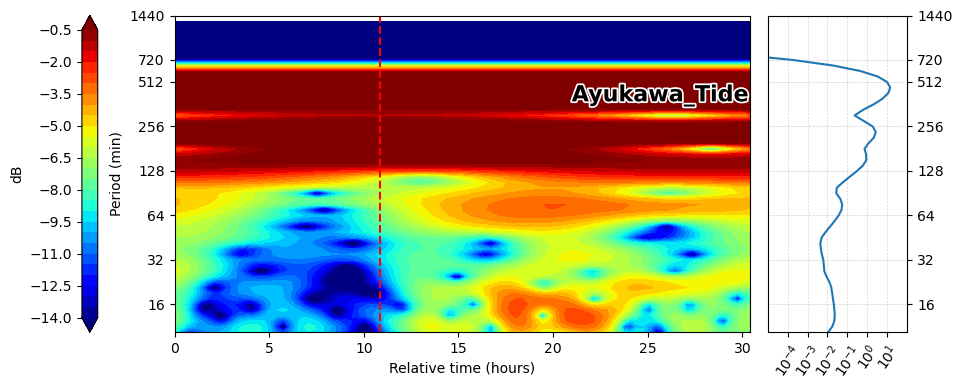

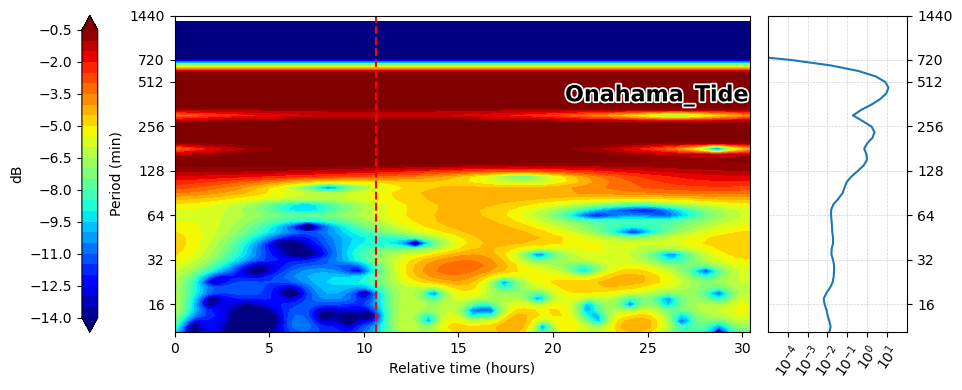

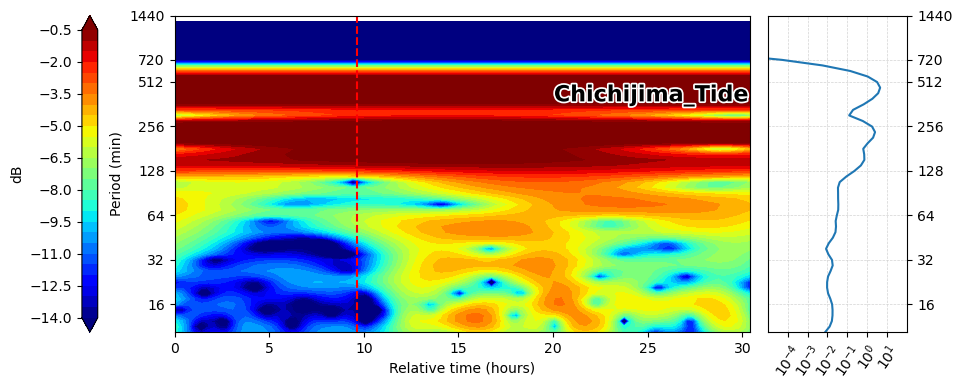

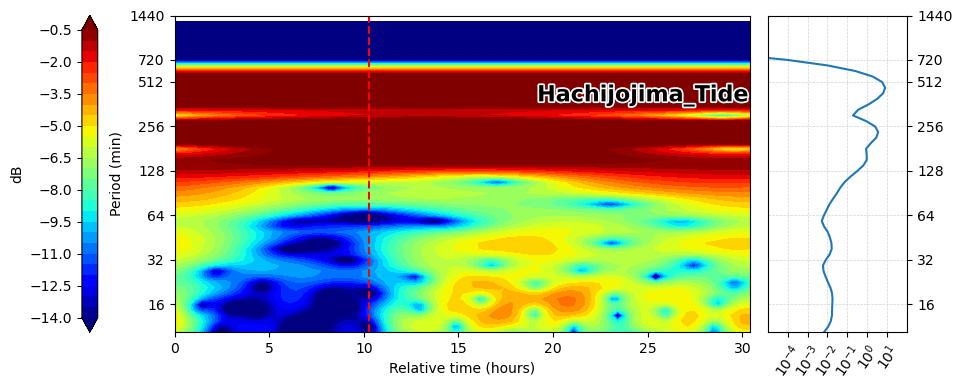

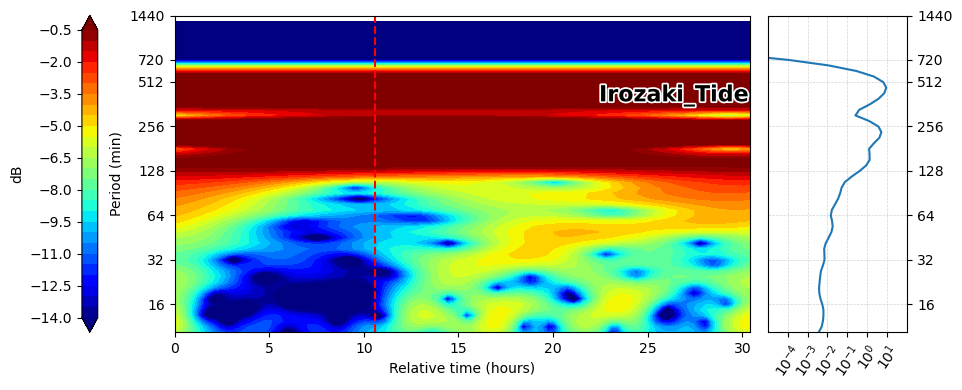

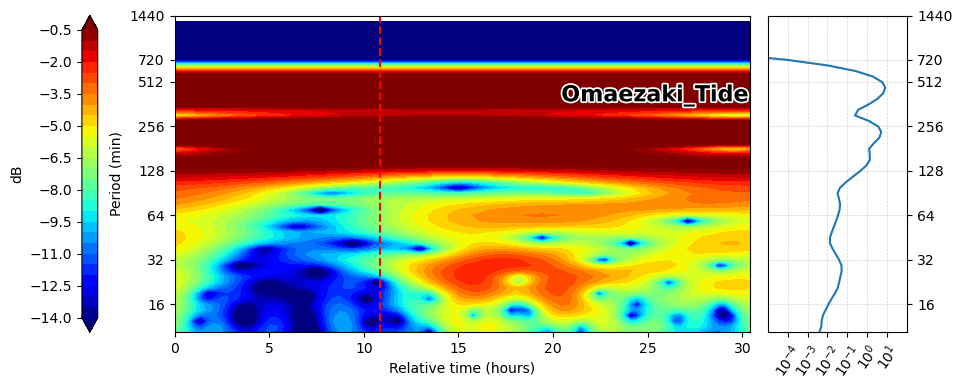

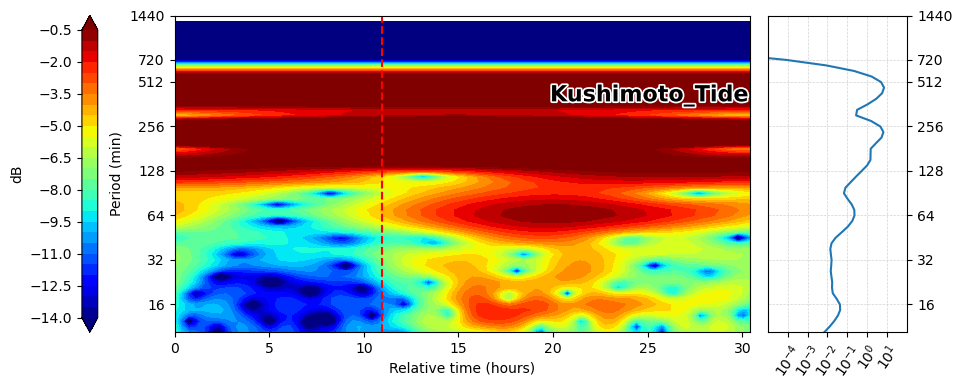

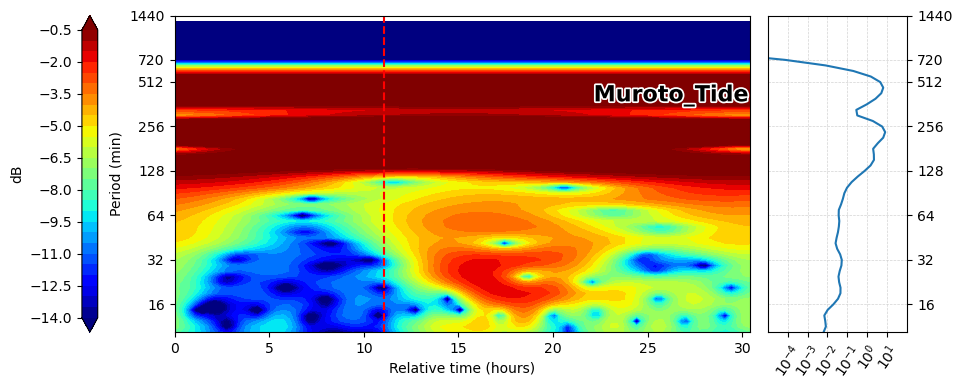

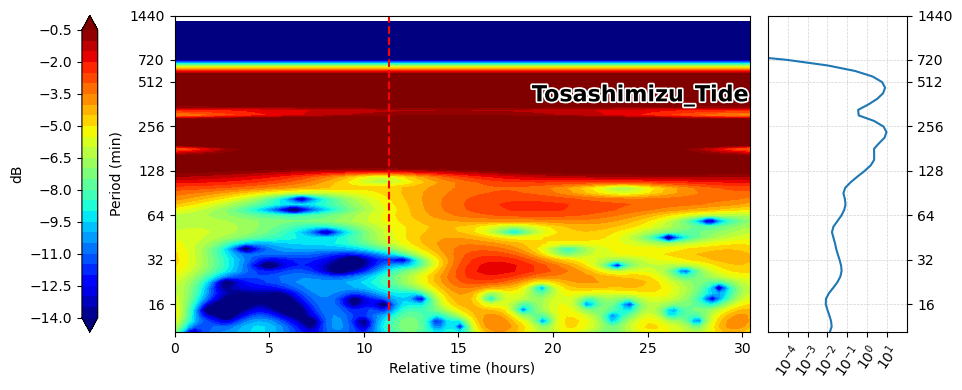

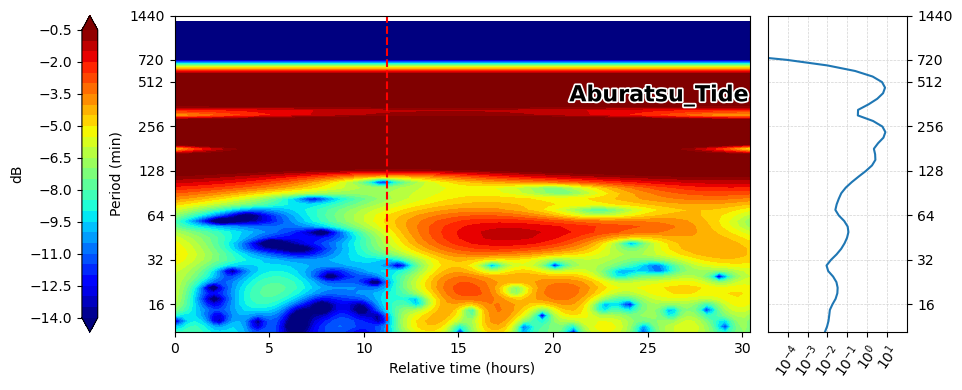

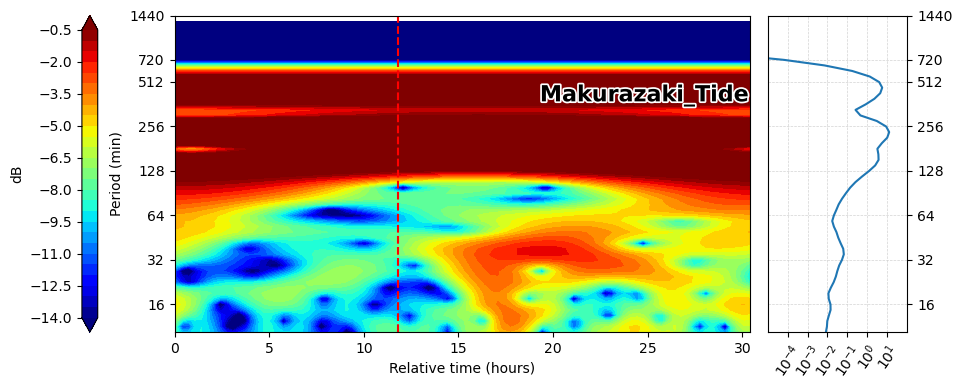

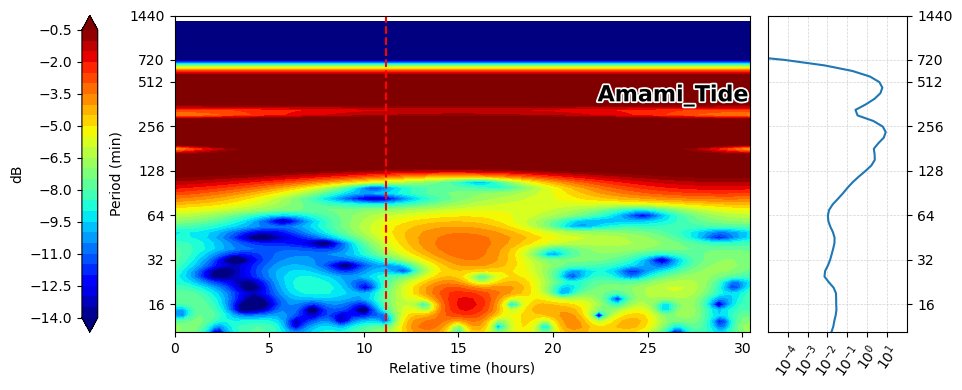

In [46]:
for row in dftt.iteritems():
    data = row[1].to_numpy()
    for i,st in ttt.iterrows():
        if st.Station == row[0][:-5]:
            minutes = st.minutes / 60.0
            break
        else:
            minutes = 0
    plot_stations(data,stations=[row[0]],min=minutes)

# Continous Wavelet Transform

In [6]:
import pandas as pd
import matplotlib.style as mpls
mpls.use('default')

## Tide data

In [7]:
dft = pd.read_csv('./data/tide_japan.csv',index_col=0)
dft = dft[100:-100] #not using first and last 100 records
print(f'Shape:{dft.shape}')
dft.head()

FileNotFoundError: [Errno 2] No such file or directory: './data/tide_japan.csv'

In [ ]:
dft.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15),lw=1);

## Detided data

In [ ]:
dftk = pd.read_csv('./data/residual_tide_japan.csv',index_col=0)
dftk = dftk[100:-100]
print(f'Shape:{dftk.shape}')
dftk.head()

In [ ]:
dftk.plot(subplots=True,layout=(5,3),sharex=True,sharey=True,figsize=(15,15),lw=1);

## Plot waveform and CWT

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
from scipy import signal
mpls.use('default')

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

df_cwt = dftk
col = 14
sign = df_cwt.iloc[:,col].to_numpy()
xt = np.arange(0,df_cwt.shape[0],1)
## RIcker (Mexican hat)
# a,b = 2,180 #is this 10min to 900min=15h?
# widths = np.arange(a,b)
# cwtmatr = signal.cwt(sign,signal.ricker,widths)

## Morlet
fs = 1/5
w=6.
freq=np.linspace(1/180,1/2,len(sign))
p = [1/x for x in freq]
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sign,signal.morlet2,widths,w=w)

fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
xt = np.arange(0,df_cwt.shape[0],1)
axs[0].plot(xt,sign,c='k',lw=0.5)
axs[0].set_ylabel('h,m')
axs[0].set_title(f'Tide: {df_cwt.columns[col]}')

im = axs[1].pcolormesh(xt,freq, np.abs(cwtm), cmap='jet', 
                       shading='gouraud')
                      # vmin=120,vmax=140)
                      #  vmin=-abs(cwtm).max(),vmax=abs(cwtm).max())
# im = axs[1].imshow(cwtmatr,cmap='jet',extent=[0,len(sign),a,b],aspect='auto',
                  #  vmin=-10,vmax=5)
                #    vmin=-abs(cwtmatr).max(),vmax=abs(cwtmatr).max())

axs[1].contour(xt,freq,np.abs(cwtm),colors='k',origin='upper',linewidths=0.5)
axs[1].set_title(f'Continous Wavelet Transform: {df_cwt.columns[col]}')
# # axs[1].set_xlim(500,2250)
axs[1].set_xlabel('Time(min)')
# # axs[1].set_xticks(xt)
# # axs[1].set_xticklabels(xl)
axs[1].set_ylabel('Frequency (cpm)')
# # axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
# axs[1].set_ylim(a,b)


secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
secax.set_yticks([2,5,15,30,180])
secax.set_yticklabels([2,5,15,30,180])
secax.set_ylabel('Period [min]')
fig.subplots_adjust(right=0.78)
cbar_ax = fig.add_axes([0.85,0.11,0.025,0.35])
fig.colorbar(im,cax=cbar_ax,label='Log2 (spectral energy)')

## Plot All wf and cwt

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as mpls
from scipy import signal
mpls.use('default')
plt.ioff()

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

def cwt_plot(col,df_cwt,save=False):
  col = col
  sign = df_cwt.iloc[:,col].to_numpy()
  xt = np.arange(0,df_cwt.shape[0],1)
  ## Morlet
  fs = 1/5
  w=6.
  freq=np.linspace(1/180,1/2,len(sign))
  widths = w*fs / (2*freq*np.pi)
  cwtm = signal.cwt(sign,signal.morlet2,widths,w=w)
  cwtm = np.abs(cwtm)
  # cwtm = cwtm.real
  # cwtm = np.log2(cwtm)

  fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
  xt = np.arange(0,df_cwt.shape[0],1)
  axs[0].plot(xt,sign,c='k',lw=0.5)
  axs[0].set_ylabel('h,m')
  axs[0].set_title(f'Tide: {df_cwt.columns[col]}')

  im = axs[1].pcolormesh(xt,freq,cwtm, cmap='jet', 
                        shading='gouraud',vmin=0,vmax=80)

  # axs[1].contour(xt,freq,cwtm,colors='k',origin='upper',linewidths=0.5)
  axs[1].set_title(f'Continous Wavelet Transform: {df_cwt.columns[col]}')
  axs[1].set_xlabel('Time(min)')
  axs[1].set_ylabel('Frequency (cpm)')
  
  secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
  secax.set_yticks([2,5,15,30,180])
  secax.set_yticklabels([2,5,15,30,180])
  secax.set_ylabel('Period [min]')
  fig.subplots_adjust(right=0.78)
  cbar_ax = fig.add_axes([0.85,0.11,0.025,0.35])
  fig.colorbar(im,cax=cbar_ax,label='spectral energy')
  if save:
    plt.savefig(f'./cwt_figs/{col:03d}.png')

In [ ]:
plt.ioff()
for i in range(15):
    cwt_plot(i,dftk,False)

----

In [ ]:
import numpy as np
import matplotlib.style as mpls
mpls.use('default')

dft = dftk

def freq2period(x):
    # 1/x with special treatment of x == 0
    x = np.array(x).astype(float)
    near_zero = np.isclose(x, 0)
    x[near_zero] = 10e2
    x[~near_zero] = 1 / x[~near_zero]
    return x

def plot_spec(col=14, nfft=4, save=False, id=0):
    dt = 5
    sign = dft.iloc[:,col].to_numpy()
    xt = np.arange(0,dft.shape[0],1)
    # xl = np.arange(-250,dft.shape[0]*5,250)

    fig,axs = plt.subplots(2,sharex=True,figsize=(8,8))
    #plot waveform
    axs[0].plot(xt,sign,c='k',lw=0.5)
    axs[0].set_ylabel('h,m')
    axs[0].set_title(f'Tide: {dft.columns[col]}')
    
    #plot spectogram
    s,f,t,im = axs[1].specgram(sign,NFFT=nfft,Fs=5/dt,noverlap=nfft-2,cmap='jet',mode='psd')#,vmin=0,vmax=14)
    axs[1].set_title(f'Spectogram: {dft.columns[col]} / NFFT:{nfft}')
    # axs[1].set_xlim(500,2250)
    axs[1].set_xlabel('Time(min)')
    # axs[1].set_xticks(xt)
    # axs[1].set_xticklabels(xl)
    axs[1].set_ylabel('Frequency (cpm)')
    # axs[1].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    # axs[1].set_ylim(10e-2,5e-1)

    #Second axis
    secax = axs[1].secondary_yaxis('right',functions=(freq2period,freq2period))
    secax.set_yticks([2,5,10])
    secax.set_yticklabels([2,5,10])
    secax.set_ylabel('Period [min]')
    
    #Colobar
    fig.subplots_adjust(right=0.75)
    cbar_ax = fig.add_axes([0.85,0.1,0.025,0.35])
    fig.colorbar(im,cax=cbar_ax)
    cbar_ax.set_title('dB');
    
    if save:
        plt.savefig(f'./figs_k/{id:04}.png')

In [ ]:
# cases = np.arange(4,257,1)
cases = np.arange(4,12,2)
for id in cases:
    plot_spec(14,id,False,id)